# Logistic Regression

## Training

In [2]:
# Importing the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [3]:
# Loading the Dataset for the Logistic regression 
data_5 = pd.read_csv('emnist-letters-train.csv',header=None)
data_5 = np.array(data_5)

In [4]:
# Seperating Labels and its corresponding values 

# For label
m,n= data_5.shape
y_5 = data_5[:,0:1].reshape(m,1)

# Seperating x features

X_7 = data_5[:,1:n]
ones = np.ones([X_7.shape[0],1]) #This is done because for convinience X_0 is considered to have entering of only 1(for simplicity)
X_7 = np.concatenate ((ones , X_7) , axis=1)


# Setting theta matrice
theta = np.zeros([n,26])


In [1]:
#@title Setting Hyperparameters
Alpha = 0.00001 #@param {type:"slider", min:0, max:1, step:0.0000000001}
iters =  500    #@param {type:"slider", min:100, max:3000, step:100}
alpha_4 = Alpha
iters_4 = iters

In [6]:
# Defining the sigmoid function which will help us in obtaining the value of y in between 0 and 1 
def sigmoid(z):
  h_x = 1 / (1 + np.exp(-1*z))
  return h_x 

In [7]:
#Defining the cost function 
def computeCost(X,y,theta):
    z = np.dot(X,theta)
    h_x = sigmoid(z)
    tobesummed = np.multiply(-y, np.log(h_x))-np.multiply((1-y),np.log(1-h_x))   
    return np.sum(tobesummed)/(len(X))

In [8]:
# defining the gradient descent function 
def gradientDescent(X,y,iters,alpha):
    # global z
    m,n=X.shape
    theta=np.zeros((n,26))
    cost = np.zeros(iters)
    for i in range(iters):
        z= np.dot(X,theta)
        h_x=sigmoid(z)
        theta = theta - ((alpha/len(X))*(np.dot(X.T,(h_x - y))))
        cost[i]= computeCost(X, y, theta)
        print(cost[i])
        pp.scatter(i,cost[i])

    return theta,cost,h_x


12.687230499764466
11.298883458053915
9.916416999228547
8.545841817298543
7.20104539537599
5.916382727131954
4.776019270381264
3.9193859433708784
3.4136187720143676
3.181480790382758
3.0702400037192086
3.0062115611354545
2.9623134239715374
2.9269771050975635
2.896016731370712
2.8680119948703027
2.8423748067360934
2.818759263168565
2.79690872471119
2.7766148536821578
2.7577031869375785
2.7400256466648925
2.723455476998783
2.7078834195055403
2.6932147088542107
2.6793666754189074
2.6662668150795823
2.653851224086165
2.6420633213814875
2.6308527985834846
2.6201747512522
2.609988955327571
2.6002592605100148
2.5909530784351964
2.5820409481917337
2.573496165367536
2.5652944636325237
2.557413740060758
2.549833817107636
2.5425362354987877
2.53550407334174
2.528721787604849
2.5221750747703555
2.5158507479988828
2.5097366285699167
2.5038214497100575
2.4980947712051753
2.492546903426977
2.4871688395996467
2.481952195295422
2.4768891542855616
2.471972419989845
2.467195171867021
2.4625510261737635
2

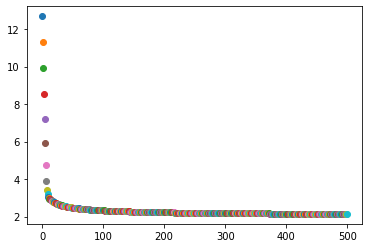

In [9]:
# Making the assignment more engaging by adding in a graph 
def Ymaker(vector):
    m=vector.size
    L = np.zeros((m,26))
    k =0
    for i in vector:
        L[k][i-1] = 1
        k += 1

    return L

L=Ymaker(y_5)
g,J,y_pred=gradientDescent(X_7,L,iters_4,alpha_4)

In [10]:
# defining a function to check the accuracy of our model 
def accuracy(y_pred,y_actual):
    count=0
    m=y_pred.size
    for i in range(m):
        if(y_pred[i]==y_actual[i]):
            count+=1
    return (count/m)*100

# The predicted y are represented in the form of 0s and 1s 
# So defining a function to convert them back to their original values
def prediction(matrix):
    
    m,n = matrix.shape
    h = np.zeros((m,1))
    for i in range(m):
        a_sliced = matrix[i]
        index =np.where(a_sliced == np.amax(a_sliced))[0]
#         print((index))
        h[i] = (index+1)
            
    return h

In [11]:
y_pred=prediction(y_pred)
y_pred

array([[11.],
       [ 7.],
       [16.],
       ...,
       [ 1.],
       [23.],
       [ 9.]])

In [12]:
accuracy(y_pred,y_5)

68.55405405405406

## Testing

In [13]:
data_6 = pd.read_csv('emnist-letters-test.csv',header =None )
data_6

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14798,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Seperating Labels and its corresponding values 

# For labels
m,n= data_6.shape
y_6 = data_6.iloc[:,0:1]

# Seperating x features

X_8 = data_6.iloc[:,1:n]
ones = np.ones([X_8.shape[0],1]) #This is done because for convinience X_0 is considered to have entering of only 1(for simplicity)
X_8 = np.concatenate ((ones , X_8) , axis=1)



In [17]:
y_pred_of_test=prediction(sigmoid(X_8@g))

In [18]:
print(len(y_pred_of_test))
print(len(y_6))

14800
14800


In [19]:
y_6 = np.array(y_6)

In [20]:
accuracy(y_pred_of_test,y_6)

66.8918918918919